In [93]:
import sys, os
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.constants import c
import importlib
import tools

In [94]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [95]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [96]:
icApi = lumapi.INTERCONNECT()

In [97]:
icApi.switchtolayout()
icApi.deleteall()

In [98]:
#units
nm = 1e-9
um = 1e-6

In [99]:
#waveguide data
ng = 4.355
neff = 2.355
#bandwidth
wavelength_start = 1475*nm
wavelength_stop = 1505*nm
centralWl = (wavelength_start + wavelength_stop)/2


In [100]:
importlib.reload(tools)
FSR1 =3.2*nm

deltaLFS = centralWl/neff #eq (3)
deltaLbase = (centralWl)**2 / (2*FSR1*ng)
deltaLshifts2st = [0, 0.75*deltaLFS] # A B 
deltaLshifts1st = [0, 0.25*deltaLFS,0.125*deltaLFS,0.375*deltaLFS] #A B C D


L = 200*um
#deltaL = tools.getDeltaL(FSR, (wavelength_start+wavelength_stop)/2, ng)
deltaL = tools.getDeltaL(FSR1, centralWl, ng)

Lpi = tools.getLpi(centralWl, neff)

delayLengths = L + np.array([deltaLbase,2*deltaLbase,-2*deltaLbase +Lpi,-2*deltaLbase])

k3st = [0.5, 0.13, 0.12, 0.5, 0.25]
k2st = [0.5, 0.29, 0.08]
k1st = [0.5, 0.5]
#2*deltaL/um
delayLengths/um


array([279.65341561, 359.30683123,  41.00951697,  40.69316877])

In [101]:
icApi.switchtolayout()

In [102]:
importlib.reload(tools)
tools.placeOna(icApi,'ona1',1000,-200,8,1000,c/wavelength_start, c/wavelength_stop)

0

## 3 st

In [103]:
importlib.reload(tools)
tools.MZILatticefilter(icApi, neff, ng, L, delayLengths, k3st,'3 st',5)

0

## 2 st A

In [104]:
importlib.reload(tools)

deltaLbase2 = deltaLbase/2

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

dl2stA = deltaLbase2 + deltaLshifts2st[0]

delayLengths = L + np.array([dl2stA,2*dl2stA,(-2*dl2stA) +Lpi,-2*dl2stA])

k2st = [0.5, 0.29, 0.08]

dl2stA/um
delayLengths/um

array([239.82670781, 279.65341561, 120.66293258, 120.34658439])

In [105]:
importlib.reload(tools)
tools.MZILatticefilter(icApi, neff, ng, L, delayLengths, k3st,'2 st A',5)

0

## 2 st B

In [106]:
importlib.reload(tools)
dl2stB = deltaLbase2 + deltaLshifts2st[1]
delayLengths = L + np.array([dl2stB,2*dl2stB,(-2*dl2stB) +Lpi,-2*dl2stB])
tools.MZILatticefilter(icApi, neff, ng, L, delayLengths, k3st,'2 st B',5)

0

## 1 st A

In [107]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stA = deltaLbase3 + deltaLshifts1st[0]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stA,2*dl1stA,(-2*dl1stA) +Lpi,-2*dl1stA])

k2st = [0.5, 0.29, 0.08]

#deltaLbase3/um
delayLengths/um

array([219.9133539 , 239.82670781, 160.48964039, 160.17329219])

In [108]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilter(icApi, neff, ng, L, delayLengths, k3st,'1 st A',5)

0

## 1 st B

In [109]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stB = deltaLbase3 + deltaLshifts1st[1]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stB,2*dl1stB,(-2*dl1stB) +Lpi,-2*dl1stB])

k2st = [0.5, 0.29, 0.08]

#deltaLbase3/um
delayLengths/um

array([220.071528  , 240.143056  , 160.17329219, 159.856944  ])

In [110]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilter(icApi, neff, ng, L, delayLengths, k3st,'1 st B',5)

0

##  1 st C

In [111]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stC = deltaLbase3 + deltaLshifts1st[2]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stC,2*dl1stC,(-2*dl1stC) +Lpi,-2*dl1stC])

k2st = [0.5, 0.29, 0.08]

#deltaLbase3/um
delayLengths/um

array([219.99244095, 239.9848819 , 160.33146629, 160.0151181 ])

In [112]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilter(icApi, neff, ng, L, delayLengths, k3st,'1 st C',5)

0

##  1 st D

In [113]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stD = deltaLbase3 + deltaLshifts1st[3]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stD,2*dl1stD,(-2*dl1stD) +Lpi,-2*dl1stD])

k2st = [0.5, 0.29, 0.08]

#deltaLbase3/um
delayLengths/um

array([220.15061505, 240.3012301 , 160.0151181 , 159.6987699 ])

In [114]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilter(icApi, neff, ng, L, delayLengths, k3st,'1 st D',5)

0

## Positioning devices

In [115]:
icApi.refresh()
#positioning compounds
icApi.setposition('3 st', 700, 100)
icApi.setposition('2 st A', 900, -10)
icApi.setposition('2 st B', 900, 200)
icApi.setposition('1 st A', 1200, -60)
icApi.setposition('1 st B', 1200, 40)
icApi.setposition('1 st C', 1200, 150)
icApi.setposition('1 st D', 1200, 250)

## Connections

In [116]:
icApi.connect('3 st', 'port 1', 'ona1', 'output')

icApi.connect('3 st', 'port 3', '2 st A', 'port 2')
icApi.connect('3 st', 'port 4', '2 st B', 'port 1')

icApi.connect('2 st A', 'port 3', '1 st B', 'port 1')
icApi.connect('2 st A', 'port 4', '1 st A', 'port 1')

icApi.connect('2 st B', 'port 3', '1 st D', 'port 1')
icApi.connect('2 st B', 'port 4', '1 st C', 'port 1')

#outputs to ona
icApi.connect('1 st A', 'port 3', 'ona1', 'input 1')
icApi.connect('1 st A', 'port 4', 'ona1', 'input 2')
icApi.connect('1 st B', 'port 3', 'ona1', 'input 3')
icApi.connect('1 st B', 'port 4', 'ona1', 'input 4')
icApi.connect('1 st C', 'port 3', 'ona1', 'input 5')
icApi.connect('1 st C', 'port 4', 'ona1', 'input 6')
icApi.connect('1 st D', 'port 3', 'ona1', 'input 7')
icApi.connect('1 st D', 'port 4', 'ona1', 'input 8')


1.0

In [117]:
icApi.run()

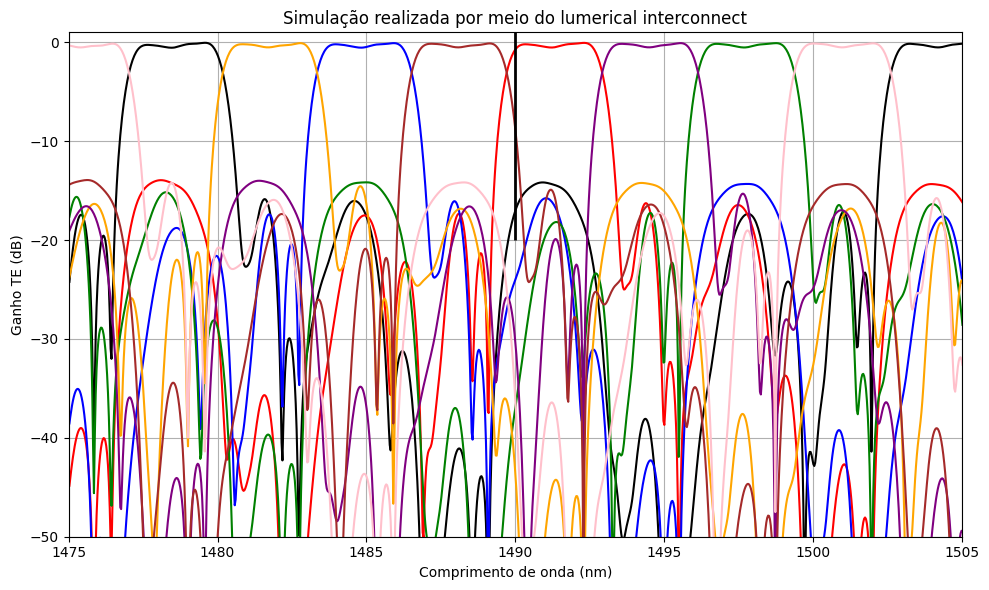

In [121]:
outputsOna = [
    'input 1/mode 1/gain',
    'input 2/mode 1/gain',
    'input 3/mode 1/gain',
    'input 4/mode 1/gain',
    'input 5/mode 1/gain',
    'input 6/mode 1/gain',
    'input 7/mode 1/gain',
    'input 8/mode 1/gain'
]

colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
styles = []
labels = [f'Porta {i+1}' for i in range(8)]


plt.figure(figsize=(10,6))
for i, path in enumerate(outputsOna):
    data = icApi.getresult('ona1', path)
    plt.plot(data['wavelength']/nm, data['TE gain (dB)'], color=colors[i], label=labels[i])

plt.xlabel('Comprimento de onda (nm)')
plt.ylabel('Ganho TE (dB)')
plt.xlim(wavelength_start/nm, wavelength_stop/nm)
plt.ylim(-50, 1)
plt.grid(True)
plt.title('Simulação realizada por meio do lumerical interconnect')
plt.tight_layout()
plt.savefig('DeMux_artigo_4thorder.png', dpi=300)